In [11]:
import pandas as pd
from sqlalchemy import create_engine
import os
import geopandas as gpd
import matplotlib.pyplot as plt

credenciales = dict(
    POSTGRES_DB="db_isa",
    POSTGRES_USER="postgres",
    POSTGRES_PASSWORD="ninguna.123",
    POSTGRES_HOST="extended-case-4.crccn2eby4ve.us-east-2.rds.amazonaws.com",
    POSTGRES_PORT=5432,
)

# Database information from env variables
DATABASES = {
    "db_isa": {
        "NAME": credenciales.get("POSTGRES_DB"),
        "USER": credenciales.get("POSTGRES_USER"),
        "PASSWORD": credenciales.get("POSTGRES_PASSWORD"),
        "HOST": credenciales.get("POSTGRES_HOST"),
        "PORT": credenciales.get("POSTGRES_PORT"),
    },
}

# choose the database to use
db = DATABASES["db_isa"]

# construct an engine connection string
engine_string = (
    "postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}".format(
        user=db["USER"],
        password=db["PASSWORD"],
        host=db["HOST"],
        port=db["PORT"],
        database=db["NAME"],
    )
)

# create sqlalchemy engine
engine = create_engine(engine_string)

table_id = 1
# # read failures table from database into pandas dataframe
# discharges = pd.read_sql_table(f"tbl_discharges_{table_id}", engine)
outages = pd.read_sql_table(f"tbl_outages_{table_id}", engine)
towers_1= pd.read_sql_table(f"tbl_towers_1", engine)
towers_2= pd.read_sql_table(f"tbl_towers_2", engine)
towers_3= pd.read_sql_table(f"tbl_towers_3", engine)

# outages.iloc[0].astype(str)
# outages.set_index("id_outages", inplace=True)

lineas_dict = {
    "comuneros": "Comuneros Primavera",
    "cerromatoso": "Cerromatoso Primavera",
    "virginia": "La Virginia San Carlos",
}
lineas_dict_numbers = {
    "comuneros": 1,
    "cerromatoso": 2,
    "virginia": 3,
}


def get_discharges(date_first="2018-04-05", num_days=1, table_id=1):
    df = pd.read_sql_query(
        f"""SELECT * FROM tbl_discharges_{table_id}
                        WHERE date BETWEEN ('{date_first}'::date - interval '{num_days} days') AND ('{date_first}'::date + interval '{num_days} days') """,
        engine,
    )
    return df


In [23]:
get_discharges(date_first="2018-04-05  17:34:46.823")

,id_discharges,date,longitude,latitude,polarity,magnitude,current,line
0,2555,2018-04-04 16:15:45.703,-73.8141,6.3493,-1,6.1,-6.1,1
1,2556,2018-04-04 17:29:55.410,-74.2904,6.7582,1,3.3,3.3,1
2,2557,2018-04-04 17:34:46.823,-74.2373,7.1087,-1,23.2,-23.2,1
3,2558,2018-04-04 17:40:21.067,-74.3081,6.8229,-1,5.5,-5.5,1
4,2559,2018-04-04 17:44:52.327,-74.3131,6.7107,1,8.3,8.3,1
...,...,...,...,...,...,...,...,...
1163,3718,2018-04-05 19:47:16.653,-74.2431,6.5128,-1,10.3,-10.3,1
1164,3719,2018-04-05 20:15:27.323,-73.665,6.3683,-1,5.0,-5.0,1
1165,3720,2018-04-05 22:04:50.017,-74.2312,6.4053,-1,10.1,-10.1,1
1166,3721,2018-04-05 23:59:08.597,-74.255,6.8675,1,12.9,12.9,1


In [77]:
def last_24hours(date_first="2018-04-05 22:09:50.017",table_id=1):
    df = pd.read_sql_query(
        f"""SELECT * FROM tbl_discharges_{table_id}
                        WHERE date BETWEEN ('{date_first}'::timestamp - '24 hours'::interval) AND ('{date_first}'::timestamp - '5 minutes'::interval)""",
        engine,
    )
    return df

In [99]:
(datetime.now() - timedelta(days=365)).strftime('%Y-%m-%d %H-%M-%S.%f')

'2019-11-15 15-41-28.935153'

In [97]:
from datetime import datetime, timedelta
datetime.now().strftime('%Y-%m-%d %H-%M-%S.%f')

'2020-11-14 15-34-40.757211'

In [78]:
last_24hours().sort_values('date', ascending= False)

,id_discharges,date,longitude,latitude,polarity,magnitude,current,line
319,3720,2018-04-05 22:04:50.017,-74.2312,6.4053,-1,10.1,-10.1,1
318,3719,2018-04-05 20:15:27.323,-73.665,6.3683,-1,5.0,-5.0,1
317,3718,2018-04-05 19:47:16.653,-74.2431,6.5128,-1,10.3,-10.3,1
316,3717,2018-04-05 19:31:09.073,-74.3358,6.3513,-1,11.0,-11.0,1
315,3716,2018-04-05 18:48:22.433,-74.1884,7.0424,-1,11.0,-11.0,1
...,...,...,...,...,...,...,...,...
4,3405,2018-04-04 22:14:01.570,-73.6886,7.1467,-1,20.0,-20.0,1
3,3404,2018-04-04 22:14:01.503,-73.6507,7.134,-1,13.1,-13.1,1
2,3403,2018-04-04 22:14:01.467,-73.6549,7.1484,-1,26.9,-26.9,1
1,3402,2018-04-04 22:14:01.447,-73.6592,7.1421,1,23.7,23.7,1


In [5]:
def convertir_gdf(df, crs='EPSG:4326'):
    gdf  = gpd.GeoDataFrame(
        df,
        geometry=gpd.points_from_xy(
            df.longitude, df.latitude
        ),crs=crs
    )
    gdf.to_crs('EPSG:3116')
    return gdf

<AxesSubplot:>

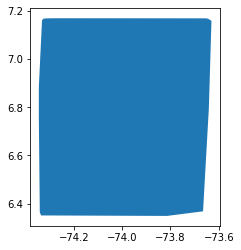

In [6]:
polygon  = convertir_gdf(get_discharges()).unary_union.convex_hull
grid = gpd.GeoDataFrame({'geometry':polygon}, index=[0])
grid.plot()

<AxesSubplot:>

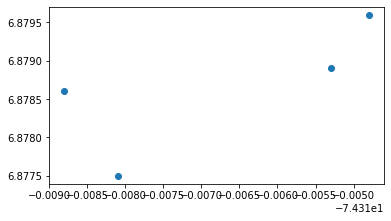

In [7]:
convertir_gdf(get_discharges()).iloc[65:69].plot()

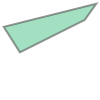

In [8]:
convertir_gdf(get_discharges()).iloc[65:69].unary_union.convex_hull

In [9]:
training_1 = pd.read_csv(r"C:\Users\Camilo\Proyectos\DS4A\project_ISA\features\training_set_line_1.csv")

In [10]:
training_2 = pd.read_csv(r"C:\Users\Camilo\Proyectos\DS4A\project_ISA\features\training_set_line_2.csv")

In [11]:
training_3 = pd.read_csv(r"C:\Users\Camilo\Proyectos\DS4A\project_ISA\features\training_set_line_3.csv")

In [12]:
def intento(df):
    auxi = df.pipe(convertir_gdf, crs='EPSG:4326').unary_union.convex_hull
    poli = gpd.GeoDataFrame(geometry=[auxi], crs='EPSG:4326')
    return poli.to_crs('EPSG:3116').area

In [13]:
auxi = training_2[training_2['clusters']==1].pipe(convertir_gdf, crs='EPSG:4326').unary_union.convex_hull
poli = gpd.GeoDataFrame(geometry=[auxi], crs='EPSG:4326')
poli.to_crs('EPSG:3116').area

0    4.148350e+08
dtype: float64

In [25]:
training_1


Index(['Unnamed: 0', 'time_delta', 'latitude', 'longitude', 'latitude_rad',
       'longitude_rad', 'clusters', 'date', 'polarity', 'magnitude', 'current',
       'line', 'x', 'y', 'lon_failure', 'lat_failure', 'dist_failure_km',
       'label', 'outage'],
      dtype='object')

In [44]:
%%time
training_1.groupby(['clusters']).apply(lambda df:df.pipe(convertir_gdf).unary_union.convex_hull)

Wall time: 7.26 s


clusters
1.0     POLYGON ((-74.04089999999999 6.3486, -74.1576 ...
2.0     POLYGON ((-74.1133 6.3485, -74.16589999999999 ...
3.0     POLYGON ((-74.07890000000002 6.3485, -74.3117 ...
4.0     POLYGON ((-73.8951 7.127000000000002, -73.9788...
5.0     POLYGON ((-73.96600000000002 6.9237, -74.0612 ...
6.0     POLYGON ((-74.176 6.741000000000001, -74.18040...
7.0     POLYGON ((-73.68470000000001 6.650800000000001...
8.0     POLYGON ((-73.91199999999998 6.3493, -73.95950...
9.0     POLYGON ((-74.05029999999999 6.3487, -74.1125 ...
10.0    POLYGON ((-73.7696 6.5465, -73.8004 6.5585, -7...
11.0    POLYGON ((-73.634 6.620100000000001, -73.6596 ...
12.0    POLYGON ((-74.286 6.4799, -74.3442 6.5179, -74...
13.0    POLYGON ((-74.2987 6.728, -74.2997 6.7284, -74...
14.0    POLYGON ((-74.26479999999999 6.3486, -74.2654 ...
15.0    POLYGON ((-73.8272 6.9454, -73.857 6.9808, -73...
16.0    POLYGON ((-73.6464 7.0139, -73.67059999999999 ...
17.0    POLYGON ((-73.7824 6.4429, -73.7876 6.444, -73...
18.0 

In [43]:
%%time
df_training =  training_1
for i in df_training.clusters.unique():
    auxi = df_training[df_training['clusters']==i].pipe(convertir_gdf).unary_union.convex_hull

Wall time: 7.45 s


In [37]:
areas_dict={}
df_training =  training_1
for i in df_training.clusters.unique():
    print(i)
    auxi = df_training[df_training['clusters']==i].pipe(convertir_gdf, crs='EPSG:4326').unary_union.convex_hull
    poli = gpd.GeoDataFrame(geometry=[auxi], crs='EPSG:4326')
    areas_dict[i] = poli.to_crs('EPSG:3116').area.iloc[0]
pd.DataFrame.from_dict(areas_dict, orient='index', columns=['Area_metros']).to_excel('training_areas_1.xlsx')

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0


KeyboardInterrupt: 

In [19]:
from matplotlib_scalebar.scalebar import ScaleBar

In [85]:
poli.centroid.distance(towers_projected.unary_union).iloc[0]

138760.6035230156

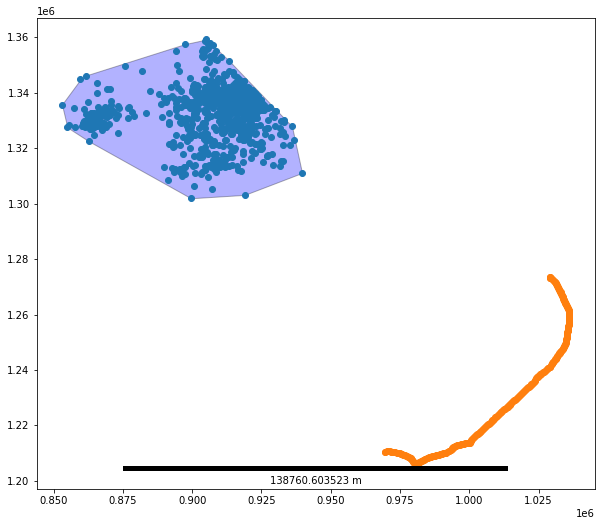

In [84]:
fig,ax = plt.subplots(figsize=(10,10))
cluster_id = 50
df_training =  training_2
auxi = df_training[df_training['clusters']==cluster_id].pipe(convertir_gdf, crs='EPSG:4326').unary_union.convex_hull
poli = gpd.GeoDataFrame(geometry=[auxi], crs='EPSG:4326').to_crs('EPSG:3116')
poli.plot(ax=ax, color='blue', edgecolor='k', alpha=0.3)
df_training[df_training['clusters']==cluster_id].pipe(convertir_gdf, crs='EPSG:4326').to_crs('EPSG:3116').plot(ax=ax)
towers_projected = towers.pipe(convertir_gdf).to_crs('EPSG:3116')
towers_projected.plot(ax=ax)

# Visualizacion
ax.add_artist(ScaleBar(1,frameon=False, scale_loc='bottom', label_loc='top',location='lower center', fixed_value=138760.603523))
# buf_dist=0
# xlim = ([poli.buffer(buf_dist).total_bounds[0],  poli.buffer(buf_dist).total_bounds[2]])
# ylim = ([poli.buffer(buf_dist).total_bounds[1],  poli.buffer(buf_dist).total_bounds[3]])

# ax.set_xlim(xlim)
# ax.set_ylim(ylim)
fig.savefig('xxx_borrar.pdf')

<AxesSubplot:>

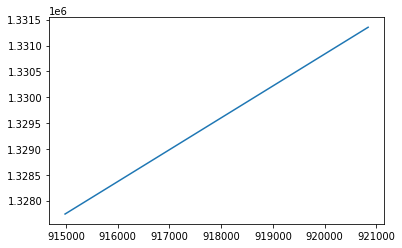

In [144]:
poli.plot()

In [60]:
df_training =  training_1
df_towers = towers_1
#distancias de puntos
for i,(df_towers,df_training) in enumerate(zip([towers_1,towers_2,towers_3], [training_1, training_2, training_3])):
    distancias_dict={}
    for cluster_id in df_training.clusters.unique():
        print(cluster_id)
        auxi = df_training[df_training['clusters']==cluster_id].pipe(convertir_gdf, crs='EPSG:4326').to_crs('EPSG:3116')
        towers_projected = df_towers.pipe(convertir_gdf).to_crs('EPSG:3116')
        distancia = auxi.distance(towers_projected.unary_union).min()
        distancias_dict[cluster_id] = distancia
    pd.DataFrame.from_dict(distancias_dict, orient='index', columns=['dist_puntos_min']).to_excel(f'training_dist_puntos_min_{i+1}.xlsx')
        

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
42.0
41.0
43.0
44.0
45.0
46.0
47.0
48.0
50.0
49.0
51.0
52.0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
70
69
71
72
73
74
76
75
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
127
126
128
129
130
132
131
133
134
135
136
137
138
139
140
141
142
143
145
144
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
168
167
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
214
213
2

In [92]:
#distancia maxima de los puntos
for i,(df_towers,df_training) in enumerate(zip([towers_1,towers_2,towers_3], [training_1, training_2, training_3])):
    if i==0:
        distancias_dict={}
        for cluster_id in df_training.clusters.unique():
            print(cluster_id)
            auxi = df_training[df_training['clusters']==cluster_id].pipe(convertir_gdf, crs='EPSG:4326').to_crs('EPSG:3116')
            towers_projected = df_towers.pipe(convertir_gdf).to_crs('EPSG:3116')
            distancia = auxi.distance(towers_projected.unary_union).max()
            distancias_dict[cluster_id] = distancia
        pd.DataFrame.from_dict(distancias_dict, orient='index', columns=['dist_puntos_max']).to_excel(f'training_dist_puntos_max_{i+1}.xlsx')
        

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
42.0
41.0
43.0
44.0
45.0
46.0
47.0
48.0
50.0
49.0
51.0
52.0


In [73]:
paths

[WindowsPath('features_2.xlsx'),
 WindowsPath('training_areas_2.xlsx'),
 WindowsPath('training_dist_puntos_max_2.xlsx'),
 WindowsPath('training_dist_puntos_min_2.xlsx')]

In [72]:
i=2
paths = list(Path('./').glob(f'*_{i}.xlsx'))
df_concatenado = pd.concat([pd.read_excel(path, index_col=0) for path in paths], axis=1,)
df_concatenado

,Area_metros,dist_puntos_max,dist_puntos_min,Area_metros.1,dist_puntos_max.1,dist_puntos_min.1,Area_metros,dist_puntos_max,dist_puntos_min
1,4.148350e+08,29648.126933,14699.911161,4.148350e+08,29648.126933,14699.911161,4.148350e+08,29648.126933,14699.911161
2,1.767924e+08,22551.723267,263.423847,1.767924e+08,22551.723267,263.423847,1.767924e+08,22551.723267,263.423847
3,4.410064e+08,17226.711943,203.507807,4.410064e+08,17226.711943,203.507807,4.410064e+08,17226.711943,203.507807
4,5.664517e+07,29672.095650,22475.369334,5.664517e+07,29672.095650,22475.369334,5.664517e+07,29672.095650,22475.369334
5,4.241427e+07,23313.661399,9714.889682,4.241427e+07,23313.661399,9714.889682,4.241427e+07,23313.661399,9714.889682
...,...,...,...,...,...,...,...,...,...
1150,2.486456e+07,17045.703448,9235.011187,2.486456e+07,17045.703448,9235.011187,2.486456e+07,17045.703448,9235.011187
1151,3.170265e+06,13393.724060,10552.181418,3.170265e+06,13393.724060,10552.181418,3.170265e+06,13393.724060,10552.181418
1152,3.715355e+08,29951.468048,10621.194821,3.715355e+08,29951.468048,10621.194821,3.715355e+08,29951.468048,10621.194821
1153,1.214920e+07,29750.693648,21249.115337,1.214920e+07,29750.693648,21249.115337,1.214920e+07,29750.693648,21249.115337


In [93]:
from pathlib import Path

for i in range(1,4):
    paths = list(Path('./').glob(f'*_{i}.xlsx'))
    df_concatenado = pd.concat([pd.read_excel(path, index_col=0) for path in paths], axis=1,)
    df_concatenado.to_excel(f'features_{i}.xlsx')

In [89]:
for i,(df_towers,df_training) in enumerate(zip([towers_1,towers_2,towers_3], [training_1, training_2, training_3])):
    distancias_dict={}
    for cluster_id in df_training.clusters.unique():
        print(cluster_id)
        auxi = df_training[df_training['clusters']==cluster_id].pipe(convertir_gdf, crs='EPSG:4326').unary_union.convex_hull
        towers_projected = df_towers.pipe(convertir_gdf).to_crs('EPSG:3116')
        poli = gpd.GeoDataFrame(geometry=[auxi], crs='EPSG:4326').to_crs('EPSG:3116')
        distancia = poli.distance(towers_projected.unary_union).iloc[0]
        print(distancia)
        distancias_dict[cluster_id] = distancia
    pd.DataFrame.from_dict(distancias_dict, orient='index', columns=['dist_poligono']).to_excel(f'training_dist_poligono_{i+1}.xlsx')

.03758729267
795
7752.037299477104
796
0.0
797
4573.965072694263
798
6477.833108113204
799
2750.0238964371692
800
5795.28056155782
801
0.0
802
18800.871307120353
803
12328.96370049851
804
20416.53987550323
805
1611.4850665364013
806
15076.345351437332
807
2327.1095446874733
808
27217.503184193545
809
4844.754950836944
810
0.0
811
3983.016565346174
812
0.0
813
14145.187179732113
814
0.0
815
0.0
816
790.9966705390723
817
18549.84352416161
819
0.0
818
17657.605513661383
820
1129.1970192302322
821
0.0
822
16781.24382416673
823
0.0
824
18467.796897211654
825
23795.357305179725
826
26170.3822615294
827
26350.832481152975
828
4112.172112410922
829
883.0898175523271
830
2195.828046989826
831
18374.000316870588
832
8133.4643422852005
833
0.0
834
6557.926151646433
835
23915.396130152196
836
27534.509681649004
837
13727.752129477403
838
0.0
839
22384.10309683886
840
3514.4454679509413
841
0.0
842
0.0
843
0.0
844
0.0
845
8746.641550924862
846
5448.0478553456405
847
21582.038171874305
848
25944.065

In [90]:
for i,(df_towers,df_training) in enumerate(zip([towers_1,towers_2,towers_3], [training_1, training_2, training_3])):
    distancias_dict={}
    for cluster_id in df_training.clusters.unique():
        print(cluster_id)
        auxi = df_training[df_training['clusters']==cluster_id].pipe(convertir_gdf, crs='EPSG:4326').unary_union.convex_hull
        towers_projected = df_towers.pipe(convertir_gdf).to_crs('EPSG:3116')
        poli = gpd.GeoDataFrame(geometry=[auxi], crs='EPSG:4326').to_crs('EPSG:3116')
        distancia =poli.centroid.distance(towers_projected.unary_union).iloc[0]
        print(distancia)
        distancias_dict[cluster_id] = distancia
    pd.DataFrame.from_dict(distancias_dict, orient='index', columns=['dist_centro']).to_excel(f'training_dist_centro_{i+1}.xlsx')



12452.961188956562
962
3037.3574333046076
963
13802.213012929942
964
1772.3267174560003
965
20638.052063604155
966
4541.259346635973
967
4876.66956661024
968
15478.11969905393
969
19943.030821810746
970
25608.73751248521
972
25375.989523286982
971
7181.3666836069015
973
12083.822038406866
974
24468.649513415643
975
22986.348885407984
976
16722.775290842605
977
7703.184718818145
978
11346.50028663089
979
18207.935937864444
980
25605.443391243396
981
14288.204670500842
983
4808.344120965318
982
20371.58462869529
984
22348.548406065318
985
16316.757369107605
986
14764.901675038773
987
27089.05216403081
988
1626.2972393703276
989
23583.686516391408
990
24430.791774078298
991
2942.553135530092
992
10875.767541706731
993
22807.351825866892
994
20925.96573627288
996
22832.74251648134
995
23593.397009786928
997
26817.254507625203
998
2764.4131492667875
999
27478.09337560074
1000
4579.633782065733
1001
22504.710891990173
1002
13240.432627628239
1003
21573.844966169483
1004
22855.76038360839
10

In [20]:
puntos = df_training[df_training['clusters']==i].pipe(convertir_gdf, crs='EPSG:4326').unary_union
gpd.GeoDataFrame(geometry=[puntos], crs='EPSG:4326').to_crs('EPSG:3116')

,geometry
0,"MULTIPOINT (1001901.507 1262685.282, 1003415.4..."


In [45]:
list(poli.geometry.boundary.iloc[0].coords)

[(1012323.0904698867, 1257389.4069958488),
 (1001801.8424075965, 1268834.1255275486),
 (999724.6752659233, 1273069.7296901536),
 (1001039.2237412538, 1280977.0137206144),
 (1005346.946895461, 1284040.6689345578),
 (1024533.5926561112, 1283272.1715736776),
 (1026864.9997038031, 1281890.9450774824),
 (1028537.0034107924, 1274670.1695198726),
 (1029811.0365190535, 1268544.0826757948),
 (1029844.3622057969, 1268234.443958579),
 (1025780.2699087696, 1264239.9005980636),
 (1012323.0904698867, 1257389.4069958488)]

,id_tower,num_tower,desc_tower,longitude,latitude,geometry
0,0,0,Portico Primavera,-74.35224659,6.499509272999999,POINT (969611.380 1210485.190)
1,1,1,145,-74.351129,6.499877,POINT (969735.019 1210525.790)
2,2,2,146,-74.344588,6.501168,POINT (970458.594 1210668.175)
3,3,3,147,-74.34156800000001,6.501142,POINT (970792.633 1210665.124)
4,4,4,148,-74.33685600000001,6.500482,POINT (971313.788 1210591.865)
...,...,...,...,...,...,...
274,274,274,418,-73.81243944,7.0652802779999995,POINT (1029284.814 1273053.762)
275,275,275,419,-73.81130278,7.067738889,POINT (1029410.238 1273325.737)
276,276,276,420,-73.81312583,7.068924443999999,POINT (1029208.752 1273456.735)
277,277,277,421,-73.81435444,7.068231389,POINT (1029073.058 1273380.012)
